<a href="https://colab.research.google.com/github/Memoona028/Plant-disease-detection-ANN-Project-/blob/main/Plant_disease_prediction_MobileNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 ### Data Source : https://www.kaggle.com/datasets/vipoooool/new-plant-diseases-dataset
##### Identify Plant Diseases

We use the PlantVillage dataset by Hughes et al. consists of about 87,000 healthy and unhealthy leaf images divided into 38 categories by species and disease. We transfered learning from MobileNet and use the weights from pre-training on ImageNet.

#### Classes

->  The following 38 classes are availaible in the dataset

- `Apple___Apple_scab`
- `Apple___Black_rot`
- `Apple___Cedar_apple_rust`
- `Apple___healthy`
- `Blueberry___healthy`
- `Cherry_(including_sour)___Powdery_mildew`
- `Cherry_(including_sour)___healthy`
- `Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot`
- `Corn_(maize)___Common_rust_`
- `Corn_(maize)___Northern_Leaf_Blight`
- `Corn_(maize)___healthy', 'Grape___Black_rot`
- `Grape___Leaf_blight_(Isariopsis_Leaf_Spot)`
- `Grape___healthy`
- `Orange___Haunglongbing_(Citrus_greening)`
- `Peach___Bacterial_spot`
- `Peach___healthy`
- `Pepper,_bell___Bacterial_spot`
- `Pepper,_bell___healthy`
- `Potato___Early_blight`
- `Potato___Late_blight`
- `Potato___healthy`
- `Raspberry___healthy`
- `Soybean___healthy`
- `Squash___Powdery_mildew`
- `Strawberry___Leaf_scorch`
- `Strawberry___healthy`
- `Tomato___Bacterial_spot`
- `Tomato___Late_blight`
- `Tomato___Leaf_Mold`
- `Tomato___Septoria_leaf_spot`
- `Tomato___Spider_mites Two-spotted_spider_mite`
- `Tomato___Target_Spot`
- `Tomato___Tomato_Yellow_Leaf_Curl_Virus`
- `Tomato___Tomato_mosaic_virus`
- `Tomato___healthy`


## Importing Dependencies


In [ ]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
import os

In [ ]:
image_size = 224
target_size = (image_size, image_size)
input_shape = (image_size, image_size, 3)

batch_size = 32
epochs = 25

### Getting data

- In order to make the most of our few training examples, we will "augment" them via a number of random transformations, so that our model would never see twice the exact same picture. This helps prevent overfitting and helps the model generalize better.

- In TensorFlow this can be done via the `tf.keras.preprocessing.image.ImageDataGenerator` class. This class allows you to:

- configure random transformations and normalization operations to be done on your image data during training
- instantiate generators of augmented image batches (and their labels) via `.flow(data, labels)` or `.flow_from_directory(directory)`. These generators can then be used with the `tf.keras` model methods that accept data generators as inputs, `fit`, `evaluate` and `predict`.

In [ ]:
#we have our seperate train,valid and test folders
#where as test folders contain images for which we have done augmentation as well (flipped,rotataion)

In [ ]:
base_dir = r"C:\Users\DELL\Downloads\New Plant Diseases Dataset(Augmented)\New Plant Diseases Dataset(Augmented)"
train_dir = os.path.join(base_dir,"train")
test_dir = os.path.join(base_dir,"valid")

### Augmentation

We will make the following augmentations to the images:

- `width_shift` and `height_shift` are ranges (as a fraction of total width or height) within which to randomly translate pictures vertically or horizontally
- `rescale` is a value by which we will multiply the data before any other processing. Our original images consist in RGB coefficients in the 0-255, but such values would be too high for our models to process (given a typical learning rate), so we target values between 0 and 1 instead by scaling with a 1/255. factor.
- `shear_range` is for randomly applying shearing transformations
- `zoom_range` is for randomly zooming inside pictures
- `fill_mode` is the strategy used for filling in newly created pixels, which can appear after a rotation or a width/height shift.

In [ ]:
train_datagen = keras.preprocessing.image.ImageDataGenerator(rescale = 1/255.0,
                                                             shear_range = 0.2,
                                                             zoom_range = 0.2,
                                                             width_shift_range = 0.2,
                                                             height_shift_range = 0.2,
                                                              brightness_range=[0.5, 1.5],
                                                             fill_mode="nearest")

test_datagen = keras.preprocessing.image.ImageDataGenerator(rescale = 1/255.0)

Let's prepare our data. We will use `.flow_from_directory()` to generate batches of image data (and their labels) directly from our images in their respective folders.

### Data generators configuration

In [ ]:
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size = (image_size, image_size),
                                               batch_size = batch_size,
                                               class_mode = "categorical")

test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size = (image_size, image_size),
                                             batch_size = batch_size,
                                             class_mode = "categorical")

Found 70295 images belonging to 38 classes.
Found 17572 images belonging to 38 classes.


## Create a classes index file (.json or .pkl)
- Option 1 - we can use pickle
- Option 2 - .json can be used as well
- We also want to know which class corresponds to which species and disease so we also create a `json` file which shows corresponding labels and class indices.

In [ ]:
categories = list(train_data.class_indices.keys())
print(train_data.class_indices)

{'Apple___Apple_scab': 0, 'Apple___Black_rot': 1, 'Apple___Cedar_apple_rust': 2, 'Apple___healthy': 3, 'Blueberry___healthy': 4, 'Cherry_(including_sour)___Powdery_mildew': 5, 'Cherry_(including_sour)___healthy': 6, 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot': 7, 'Corn_(maize)___Common_rust_': 8, 'Corn_(maize)___Northern_Leaf_Blight': 9, 'Corn_(maize)___healthy': 10, 'Grape___Black_rot': 11, 'Grape___Esca_(Black_Measles)': 12, 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)': 13, 'Grape___healthy': 14, 'Orange___Haunglongbing_(Citrus_greening)': 15, 'Peach___Bacterial_spot': 16, 'Peach___healthy': 17, 'Pepper,_bell___Bacterial_spot': 18, 'Pepper,_bell___healthy': 19, 'Potato___Early_blight': 20, 'Potato___Late_blight': 21, 'Potato___healthy': 22, 'Raspberry___healthy': 23, 'Soybean___healthy': 24, 'Squash___Powdery_mildew': 25, 'Strawberry___Leaf_scorch': 26, 'Strawberry___healthy': 27, 'Tomato___Bacterial_spot': 28, 'Tomato___Early_blight': 29, 'Tomato___Late_blight': 30, 'Tomato

In [ ]:
import json
save_dir = r'C:\Users\DELL\Downloads\files\\'

with open(save_dir + 'class_indices.json', 'w') as f:
    json.dump(train_data.class_indices, f)

## Training

We first get the base MobileNet model without including the top layers since we want to use it for 38 classes and us the pre-trained weights for ImageNet.

In [ ]:
base_model = tf.keras.applications.MobileNet(weights = "imagenet",
                                             include_top = False,
                                             input_shape = input_shape)

base_model.trainable = False



17225924/17225924 [==============================] - 33s 2us/step


We now create a small upstream model on top of the MobileNet using the functional API

#### MobileNet-Based Leaf Disease Classification Model Architecture

In [ ]:
inputs = keras.Input(shape = input_shape)

x = base_model(inputs, training = False)
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dropout(0.2)(x)
x = tf.keras.layers.Dense(len(categories),
                          activation="softmax")(x)

model = keras.Model(inputs = inputs,
                    outputs = x,
                    name="Leaf_Disease_MobileNet_Model")

In our multiple experiments we found out Adam optimizer to work really well with it's default learning rate, $\beta_1$, $\beta_2$ and $\epsilon$ values

#### Model Compilation and Optimization

In [ ]:
optimizer = tf.keras.optimizers.Adam()

model.compile(optimizer = optimizer,
              loss = tf.keras.losses.CategoricalCrossentropy(from_logits = True),
              metrics=[keras.metrics.CategoricalAccuracy(),
                       'accuracy'])

#### Model Fitting

In [ ]:
history = model.fit(train_data,
                    validation_data=test_data,
                    epochs=epochs,
                    steps_per_epoch=150,
                    validation_steps=100)

Epoch 1/25


C:\Users\DELL\anaconda3\Lib\site-packages\keras\src\backend.py:5575: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(




150/150 [==============================] - 404s 3s/step - loss: 1.9443 - categorical_accuracy: 0.4802 - accuracy: 0.4802 - val_loss: 0.7819 - val_categorical_accuracy: 0.8044 - val_accuracy: 0.8044
Epoch 2/25
150/150 [==============================] - 293s 2s/step - loss: 0.7505 - categorical_accuracy: 0.7912 - accuracy: 0.7912 - val_loss: 0.5128 - val_categorical_accuracy: 0.8575 - val_accuracy: 0.8575
Epoch 3/25
150/150 [==============================] - 273s 2s/step - loss: 0.5527 - categorical_accuracy: 0.8377 - accuracy: 0.8377 - val_loss: 0.3884 - val_categorical_accuracy: 0.8875 - val_accuracy: 0.8875
Epoch 4/25
150/150 [==============================] - 259s 2s/step - loss: 0.4517 - categorical_accuracy: 0.8660 - accuracy: 0.8660 - val_loss: 0.3230 - val_categorical_accuracy: 0.9050 - val_accuracy: 0.9050
Epoch 5/25
150/150 [==============================] - 244s 2s/step - loss: 0.3977 - categorical_accuracy: 0.8829 - accuracy: 0.8829 - val_loss: 0.3066 - val_categorical_accu

## Visualizing the training process

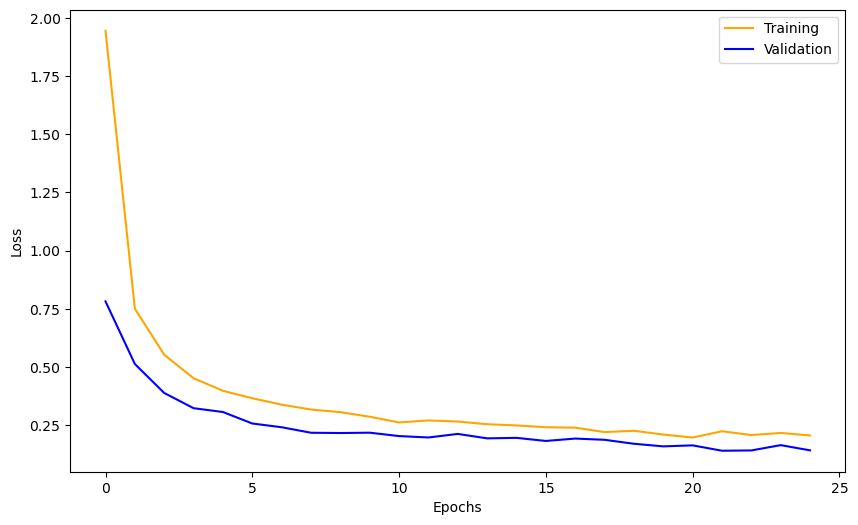

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(loss))

fig = plt.figure(figsize=(10,6))
plt.plot(epochs,loss,c="orange",label="Training")
plt.plot(epochs,val_loss,c="blue",label="Validation")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

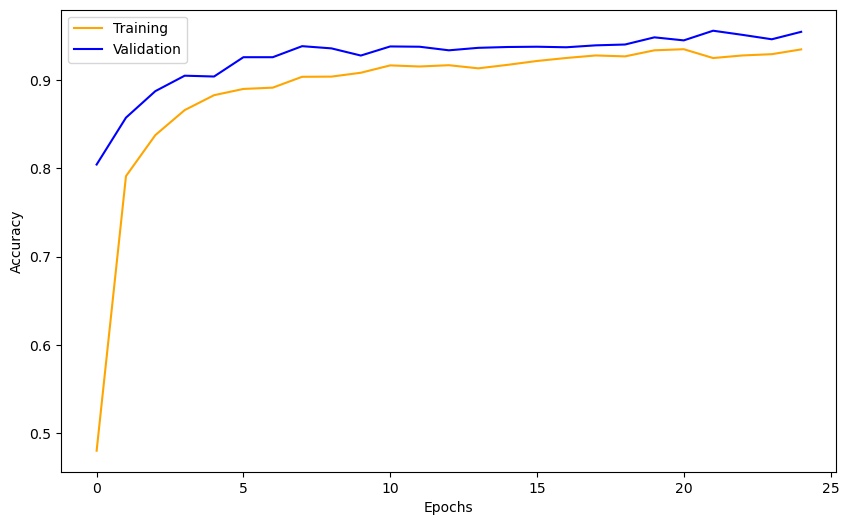

In [ ]:
acc = history.history['categorical_accuracy']
val_acc = history.history['val_categorical_accuracy']

epochs = range(len(acc))

fig = plt.figure(figsize=(10,6))
plt.plot(epochs,acc,c="orange",label="Training")
plt.plot(epochs,val_acc,c="blue",label="Validation")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

## Save the model
- We finally save the model in the standard TensorFlow 2 SavedModel format using .save()

In [ ]:
model.save(r'C:\Users\DELL\Downloads\plant_models\plant_leaf_disease_detection_MobileNet.h5')

C:\Users\DELL\anaconda3\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
import numpy as np
import cv2
import tensorflow as tf
from tf_explain.core.grad_cam import GradCAM

# Hardcoded class names
classes = ['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy',
           'Blueberry___healthy', 'Cherry___healthy', 'Cherry___Powdery_mildew',
           'Corn___Cercospora_leaf_spot Gray_leaf_spot', 'Corn___Common_rust', 'Corn___healthy',
           'Corn___Northern_Leaf_Blight', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)',
           'Grape___healthy', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
           'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy',
           'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight',
           'Potato___healthy', 'Potato___Late_blight', 'Raspberry___healthy', 'Soybean___healthy',
           'Squash___Powdery_mildew', 'Strawberry___healthy', 'Strawberry___Leaf_scorch',
           'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___healthy', 'Tomato___Late_blight',
           'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two-spotted_spider_mite',
           'Tomato___Target_Spot', 'Tomato___Tomato_mosaic_virus', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus']

# Load and compile your trained model
model = tf.keras.models.load_model(r'C:\Users\DELL\Downloads\plant_models\plant_leaf_disease_detection_MobileNet.h5')
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Select an input image from your dataset
image_path = r'C:\Users\DELL\Downloads\New Plant Diseases Dataset(Augmented)\New Plant Diseases Dataset(Augmented)\train\Apple___Apple_scab\0a5e9323-dbad-432d-ac58-d291718345d9___FREC_Scab 3417_90deg'

# Load the image
image = cv2.imread(image_path)

# Check if the image is loaded successfully
if image is None:
    print(f"Error: Unable to load image from {image_path}")
else:
    # Resize the image
    image = cv2.resize(image, (100, 100))  # Resize to match the input size of your model

    # Add batch dimension and normalize
    image = np.expand_dims(image, axis=0) / 255.0

    # Instantiate GradCAM
    grad_cam = GradCAM()

    # Get the predicted class index
    predicted_class_index = np.argmax(model.predict(image), axis=1)[0]

    # Generate the class activation map for the input image
    cam = grad_cam.explain(model, image, class_index=predicted_class_index)

    # Overlay the class activation map on the original image
    heatmap = cv2.applyColorMap(np.uint8(255 * cam), cv2.COLORMAP_JET)
    output_image = cv2.addWeighted(cv2.cvtColor(image[0], cv2.COLOR_BGR2RGB), 0.5, heatmap, 0.5, 0)

    # Display the original image and the overlaid heatmap
    cv2.imshow('Original Image', cv2.cvtColor(image[0], cv2.COLOR_BGR2RGB))
    cv2.imshow(f'Grad-CAM Heatmap for {classes[predicted_class_index]}', output_image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()


TypeError: Error when deserializing class 'DepthwiseConv2D' using config={'name': 'conv_dw_1', 'trainable': False, 'dtype': 'float32', 'kernel_size': [3, 3], 'strides': [1, 1], 'padding': 'same', 'data_format': 'channels_last', 'dilation_rate': [1, 1], 'groups': 1, 'activation': 'linear', 'use_bias': False, 'bias_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'bias_regularizer': None, 'activity_regularizer': None, 'bias_constraint': None, 'depth_multiplier': 1, 'depthwise_initializer': {'module': 'keras.initializers', 'class_name': 'GlorotUniform', 'config': {'seed': None}, 'registered_name': None}, 'depthwise_regularizer': None, 'depthwise_constraint': None}.

Exception encountered: Unrecognized keyword arguments passed to DepthwiseConv2D: {'groups': 1}

In [ ]:
!pip install --upgrade tensorflow
!pip install --upgrade keras

  Obtaining dependency information for keras from https://files.pythonhosted.org/packages/b0/b2/104733bb67fde86f3d10010f0b5c93cfa1d5bf552f904584cf9e5b3ba719/keras-3.0.5-py3-none-any.whl.metadata
  Obtaining dependency information for namex from https://files.pythonhosted.org/packages/cd/43/b971880e2eb45c0bee2093710ae8044764a89afe9620df34a231c6f0ecd2/namex-0.0.7-py3-none-any.whl.metadata
  Obtaining dependency information for dm-tree from https://files.pythonhosted.org/packages/e4/c1/522041457444b67125ac9527208bb3148f63d7dce0a86ffa589ec763a10e/dm_tree-0.1.8-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/1.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.0 MB ? eta -:--:--
   - -------------------------------------- 0.0/1.0 MB 217.9 kB/s eta 0:00:05
   - -------------------------------------- 0.0/1.0 MB 178.6 kB/s eta 0:00:06
   -- ---------------------------------

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-intel 2.15.0 requires keras<2.16,>=2.15.0, but you have keras 3.0.5 which is incompatible.
